In [2]:
import pandas as pd
import regex as re

CORRESPONDANCES = {'W': '-', 'E': '+', 'S': '-', 'N': '+'}

def coord_to_float(coordinate: str) -> float:
    pattern = re.compile(r"([\d]+)°([\d]+)?'?(\d+(?:\.\d+)?)?'' ?([NSEW])")
    match = re.search(pattern, coordinate)
    gra, min, sec = float(match[1]), float(match[2] or 0), float(match[3] or 0)
    min += sec / 60
    gra += min / 60
    dir = match[4]
    gra = float(CORRESPONDANCES[dir] + str(gra))
    return gra




callejero = pd.read_csv('direcciones.csv', encoding='latin1', sep=';')
callejero = callejero[['VIA_CLASE', 'VIA_PAR', 'VIA_NOMBRE', 'NUMERO', 'LATITUD', 'LONGITUD']]

# Coordenadas en float
callejero['FLOAT_LATITUD'] = callejero['LATITUD'].apply(coord_to_float)
callejero['FLOAT_LONGITUD'] = callejero['LONGITUD'].apply(coord_to_float)

def replace_nans(par):
    if str(par).lower() == 'nan':
        return ""
    else:
        return str(par) + " "

callejero['VIA_PAR'] = callejero['VIA_PAR'].apply(replace_nans)
callejero['NOMBRE_COMPLETO'] = callejero['VIA_CLASE'] + " " + callejero['VIA_PAR'] + callejero['VIA_NOMBRE'] + ", " + callejero['NUMERO'].astype(str)
callejero

,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUMERO,LATITUD,LONGITUD,FLOAT_LATITUD,FLOAT_LONGITUD,NOMBRE_COMPLETO
0,AUTOVÍA,,A-1,10000,40°29'21.84'' N,3°40'23.56'' W,40.489400,-3.673211,"AUTOVÍA A-1, 10000"
1,AUTOVÍA,,A-1,10000,40°29'21.45'' N,3°40'20.75'' W,40.489292,-3.672431,"AUTOVÍA A-1, 10000"
2,AUTOVÍA,,A-1,11000,40°29'48.13'' N,3°39'57.53'' W,40.496703,-3.665981,"AUTOVÍA A-1, 11000"
3,AUTOVÍA,,A-1,11000,40°29'46.27'' N,3°39'54.87'' W,40.496186,-3.665242,"AUTOVÍA A-1, 11000"
4,AUTOVÍA,,A-1,12000,40°30'13.33'' N,3°39'33.27'' W,40.503703,-3.659242,"AUTOVÍA A-1, 12000"
...,...,...,...,...,...,...,...,...,...
213231,PASEO,DEL,ZURRON,49,40°28'10.77'' N,3°35'5.92'' W,40.469658,-3.584978,"PASEO DEL ZURRON, 49"
213232,PASEO,DEL,ZURRON,51,40°28'10.81'' N,3°35'3.32'' W,40.469669,-3.584256,"PASEO DEL ZURRON, 51"
213233,PASEO,DEL,ZURRON,53,40°28'11.34'' N,3°35'2.07'' W,40.469817,-3.583908,"PASEO DEL ZURRON, 53"
213234,PASEO,DEL,ZURRON,55,40°28'11.19'' N,3°35'1.02'' W,40.469775,-3.583617,"PASEO DEL ZURRON, 55"


In [3]:
direccion = 'PASEO DEL ZURRON, 49'

# direccion.upper() in callejero['NOMBRE_COMPLETO'].unique():
print(callejero[callejero['NOMBRE_COMPLETO'] == 'CALLE DE ALBERTO AGUILERA, 23'][['FLOAT_LATITUD', 'FLOAT_LONGITUD']])

      FLOAT_LATITUD  FLOAT_LONGITUD
4562      40.429981       -3.711258


In [2]:
import callejero as ca
import importlib
importlib.reload(ca)

"""df = ca.carga_callejero()
df"""

Cargando grafo de Madrid desde "madrid.graphml"...
DiGraph with 31016 nodes and 60826 edges


KeyboardInterrupt: 

In [5]:
importlib.reload(ca)

direccion = 'Calle de Alberto Aguilera, 3'

ca.busca_direccion(direccion, df)



(40.429611111111114, -3.707486111111111)

DiGraph with 31016 nodes and 60826 edges


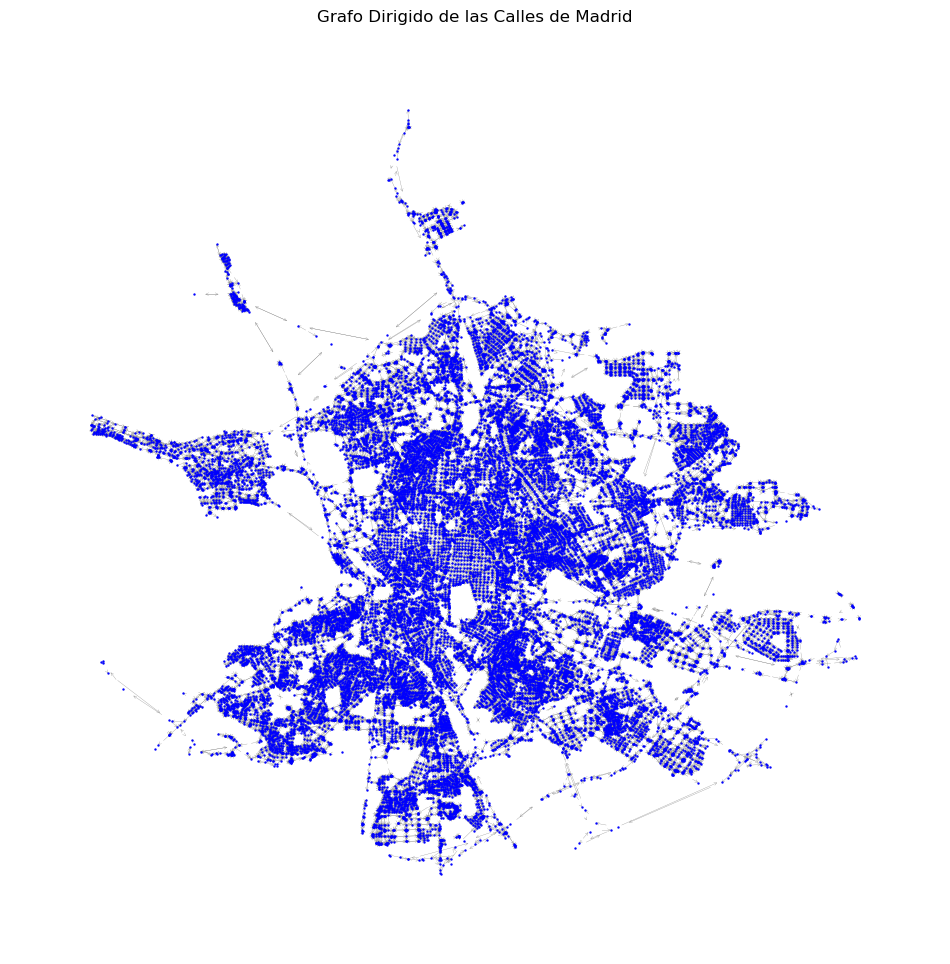

In [10]:
importlib.reload(ca)
G = ca.carga_grafo()
print(G)
ca.show_grafo(G)

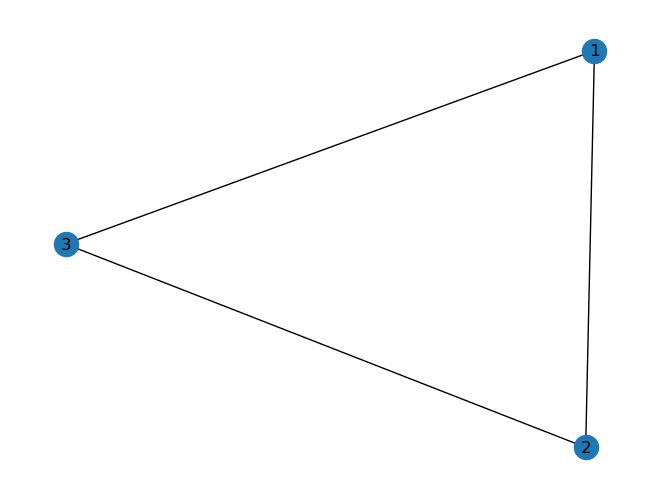

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo simple
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Intentar dibujar el grafo simple
try:
    nx.draw(G, with_labels=True)
    plt.show()
except Exception as e:
    print(f"Error al intentar dibujar el grafo simple: {e}")

In [3]:
import importlib
import callejero as ca
importlib.reload(ca)
import gps

G = ca.carga_grafo()

Cargando grafo de Madrid desde "madrid.graphml"...


TypeError: 'tuple' object does not support item assignment

In [3]:

callejero = ca.carga_callejero()
callejero.to_csv('nuevo_callejero.csv', index=False, encoding='utf-8')
print("El nuevo callejero ha sido guardado en 'nuevo_callejero.csv'.")


Leyendo el callejero de Madrid...
El nuevo callejero ha sido guardado en 'nuevo_callejero.csv'.


In [5]:
importlib.reload(gps)
importlib.reload(ca)
#origin_str = input('¿De dónde quiere salir? ')
origin_str = 'Calle del Río Bullaque, 4'
try:
    origin = ca.busca_direccion(origin_str, callejero)
    origin = gps.closest_node(origin, G)
    lat, long = G.nodes[origin]["y"], G.nodes[origin]["x"]
    print(lat, long)
    print(f'Salimos desde {(lat, long)}')
except Exception as error:
    print(error)

40.4893662 -3.700818
Salimos desde (40.4893662, -3.700818)


In [1]:
import grafo_pesado as gp
importlib.reload(gps)
importlib.reload(ca)
importlib.reload(gp)

callejero = ca.carga_callejero()
G = ca.carga_grafo()

origin_str = input('¿De dónde quiere salir? ')
try:
    origin = ca.busca_direccion(origin_str, callejero)
    origin = gps.closest_node(origin, G)
except Exception as error:
    print(error)

dest_str = input('¿A dónde quiere ir? ')
try:
    dest = ca.busca_direccion(dest_str, callejero)
    dest = gps.closest_node(dest, G)
except Exception as error:
    print(error)

peso = gps.choose()

minimo = gp.camino_minimo(G, peso, origin, dest)
print(minimo)


NameError: name 'importlib' is not defined

In [ ]:

def closest_node(coords: Tuple[int, int], G) -> Tuple[int, int]:
    """
    closest_node(coords: Tuple[int, int]) -> Tuple[int, int]
    
    Esta función encuentra el nodo más cercano en un grafo a un punto dado por sus coordenadas.
    
    Args:
        coords (Tuple[int, int]): Un par de coordenadas (latitud, longitud) que representan la ubicación del punto.
        
    Returns:
        Tuple[int, int]: El nodo más cercano al punto dado, representado por su identificador.
    """    
    point = Point(coords[1], coords[0])
    min_dist = math.inf

    for n0, n1, attributes in G.edges(data=True):

        coord_0 = (G.nodes[n0]['y'], G.nodes[n0]['x'])
        coord_1 = (G.nodes[n1]['y'], G.nodes[n1]['x'])
        # Tuplas de latitud (y), longitud (x)

        line = LineString([coord_0, coord_1])

        dist = point.distance(line)

        if dist < min_dist:
            min_dist = dist
            closest = (n0, n1)

    n0, n1 = closest
    coord_0 = (G.nodes[n0]['x'], G.nodes[n0]['y'])
    coord_1 = (G.nodes[n1]['x'], G.nodes[n1]['y'])

    dist_point_0 = point.distance(Point(coord_0))
    dist_point_1 = point.distance(Point(coord_1))

    if dist_point_0 < dist_point_1:
        return n0
    else:
        return n1
